# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'6a4a37dbaae24ce1eef54ad57e7c2e24'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold response info
lat = []
temp_max = []
hum = []
cloud = []
wind = []
long = []
city_api = []
country = []
datetime_api = []
id_counter = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [4]:

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


    # Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        #Error handling
        try:
            
            city_id = weather_json["id"]
            city_name = weather_json["name"]
        
        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
    
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            city_api.append(response["name"])
            datetime_api.append(response["dt"])
            
            #print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            print("Retrieving information for City #%d, City Name: %s" % 
             (i, city))
        except (KeyError, IndexError):
            print(f"Missing information for City: {city_name}. Skipping city.")
            


Retrieving information for City #0, City Name: albany
Missing information for City: Albany. Skipping city.
Retrieving information for City #2, City Name: upernavik
Retrieving information for City #3, City Name: faanui
Retrieving information for City #4, City Name: yumen
Retrieving information for City #5, City Name: kodiak
Retrieving information for City #6, City Name: phuket
Retrieving information for City #7, City Name: grocka
Retrieving information for City #8, City Name: kapaa
Retrieving information for City #9, City Name: kasama
Retrieving information for City #10, City Name: port hardy
Retrieving information for City #11, City Name: hofn
Retrieving information for City #12, City Name: fort nelson
Retrieving information for City #13, City Name: barrow
Retrieving information for City #14, City Name: punta arenas
Retrieving information for City #15, City Name: pamekasan
Retrieving information for City #16, City Name: puerto escondido
Retrieving information for City #17, City Name: r

Retrieving information for City #144, City Name: batemans bay
Retrieving information for City #145, City Name: flin flon
Retrieving information for City #146, City Name: tonala
Retrieving information for City #147, City Name: klaksvik
Retrieving information for City #148, City Name: ulaanbaatar
Retrieving information for City #149, City Name: provideniya
Retrieving information for City #150, City Name: kalikino
Retrieving information for City #151, City Name: ponta do sol
Missing information for City: Ponta do Sol. Skipping city.
Retrieving information for City #153, City Name: plettenberg bay
Retrieving information for City #154, City Name: san juan
Missing information for City: San Juan. Skipping city.
Missing information for City: San Juan. Skipping city.
Retrieving information for City #157, City Name: kaitangata
Retrieving information for City #158, City Name: esperance
Retrieving information for City #159, City Name: yulara
Retrieving information for City #160, City Name: mahebou

Retrieving information for City #284, City Name: bondoukou
Retrieving information for City #285, City Name: la ronge
Missing information for City: La Ronge. Skipping city.
Retrieving information for City #287, City Name: monrovia
Retrieving information for City #288, City Name: guarapari
Retrieving information for City #289, City Name: inhambane
Missing information for City: Inhambane. Skipping city.
Retrieving information for City #291, City Name: tilichiki
Missing information for City: Tilichiki. Skipping city.
Retrieving information for City #293, City Name: samarai
Retrieving information for City #294, City Name: tabas
Retrieving information for City #295, City Name: sierpc
Missing information for City: Sierpc. Skipping city.
Retrieving information for City #297, City Name: tiksi
Retrieving information for City #298, City Name: hami
Retrieving information for City #299, City Name: hanna
Retrieving information for City #300, City Name: chokurdakh
Retrieving information for City #301

Retrieving information for City #426, City Name: bella vista
Retrieving information for City #427, City Name: maumere
Missing information for City: Maumere. Skipping city.
Retrieving information for City #429, City Name: kumo
Missing information for City: Kumo. Skipping city.
Retrieving information for City #431, City Name: nichinan
Retrieving information for City #432, City Name: okato
Retrieving information for City #433, City Name: ajdabiya
Retrieving information for City #434, City Name: dingle
Retrieving information for City #435, City Name: mayen
Retrieving information for City #436, City Name: samfya
Retrieving information for City #437, City Name: pointe-noire
Retrieving information for City #438, City Name: kasongo-lunda
Retrieving information for City #439, City Name: sovetskaya
Retrieving information for City #440, City Name: waipawa
Retrieving information for City #441, City Name: lensk
Retrieving information for City #442, City Name: asosa
Retrieving information for City #

Retrieving information for City #569, City Name: shar
Retrieving information for City #570, City Name: den helder
Retrieving information for City #571, City Name: vasterhaninge
Retrieving information for City #572, City Name: sibolga
Retrieving information for City #573, City Name: inuvik
Retrieving information for City #574, City Name: ullapool
Retrieving information for City #575, City Name: novyy urengoy
Retrieving information for City #576, City Name: raton
Retrieving information for City #577, City Name: lompoc
Missing information for City: Lompoc. Skipping city.
Retrieving information for City #579, City Name: filadelfia
Retrieving information for City #580, City Name: dreux
Retrieving information for City #581, City Name: banda aceh
Retrieving information for City #582, City Name: jinchang
Retrieving information for City #583, City Name: san ramon
Retrieving information for City #584, City Name: miyako
Retrieving information for City #585, City Name: castelvetrano
Retrieving inf

In [5]:
print(lat)

[42.65, 72.79, -16.48, 40.29, 39.95, 7.89, 44.67, 22.08, -10.21, 50.7, 64.25, 58.81, -38.31, -53.16, -7.16, 15.86, -34.48, 21.78, -42.48, 1.33, 77.48, 60.75, -12.74, -34.53, -0.6, 71.97, -23.12, 8.07, -33.21, -27.83, -46.19, 46.54, 71.98, 66.83, 7.42, 6.3, -9.07, 61.01, 52.47, -33.69, -54.81, 18.69, 62.45, -9.8, 65.61, 18.9, 30.04, 20.71, 34.92, -33.93, -20.25, 45.6, -51.62, -33.59, -18.09, 43.26, 40.82, 38.52, 5.43, 35.74, -0.74, 33.93, 3.07, -16.84, -42.78, 73.51, 37.14, -0.87, 33.83, -31.43, 69.7, -22.97, 27.97, 44.42, -23.58, -13.71, 14.9, 16.86, 12.99, 15.34, 55.74, 5.88, -20.07, -8.93, -33.64, 30.85, -2.37, 36.55, 39.31, 66.77, 22.53, 67.47, -20.74, -9.11, 22.57, -5.81, 46.71, 63.75, 39.62, -41.87, -30.97, 53.1, -20.34, 17.01, 47.61, 66.56, 36.41, 54.6, 45.36, 13.08, -21.21, -21.64, 19.91, 55.34, -46.43, 29.96, 19.71, -34.72, -28.55, -34.42, 63.59, 59.2, -19.55, 35.31, 50.68, 41.19, 21.32, -15.33, 65.28, 40.42, 53.41, 41.28, 60.06, 48.01, 52.86, -35.71, 54.77, 20.62, 62.23, 47.92

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame(weather_response)
weather_df.head()

,0
0,"b'{""coord"":{""lon"":-64.79,""lat"":-23.81},""weathe..."
1,"b'odel"",""main"":{""temp"":79.74,""pressure"":1009,""..."
2,"b'ind"":{""speed"":5.17,""deg"":86},""clouds"":{""all""..."
3,"b',""timezone"":-10800,""id"":3846915,""name"":""Libe..."


In [11]:
weather_df.to_csv("Beth_weather_data.csv",index=False)

In [13]:
hum

[71,
 84,
 80,
 23,
 56,
 78,
 55,
 88,
 19,
 100,
 64,
 85,
 40,
 55,
 76,
 73,
 59,
 71,
 100,
 57,
 90,
 97,
 61,
 48,
 64,
 97,
 80,
 54,
 86,
 7,
 55,
 74,
 97,
 88,
 81,
 62,
 86,
 99,
 87,
 59,
 49,
 10,
 85,
 78,
 86,
 11,
 66,
 88,
 53,
 49,
 57,
 87,
 17,
 77,
 38,
 80,
 72,
 72,
 78,
 100,
 73,
 77,
 75,
 49,
 66,
 95,
 82,
 84,
 100,
 100,
 82,
 52,
 36,
 75,
 84,
 30,
 66,
 74,
 86,
 88,
 92,
 59,
 95,
 84,
 61,
 26,
 70,
 74,
 57,
 94,
 78,
 94,
 59,
 79,
 72,
 43,
 80,
 79,
 52,
 100,
 4,
 90,
 73,
 74,
 91,
 87,
 48,
 82,
 86,
 83,
 60,
 45,
 69,
 93,
 35,
 70,
 73,
 79,
 54,
 64,
 92,
 96,
 81,
 48,
 90,
 82,
 78,
 18,
 92,
 62,
 62,
 67,
 96,
 93,
 91,
 98,
 100,
 93,
 52,
 33,
 89,
 43,
 59,
 71,
 15,
 71,
 87,
 17,
 73,
 92,
 68,
 75,
 62,
 91,
 67,
 74,
 55,
 72,
 100,
 90,
 75,
 48,
 58,
 55,
 88,
 46,
 23,
 87,
 79,
 62,
 65,
 90,
 89,
 41,
 100,
 52,
 66,
 80,
 74,
 79,
 100,
 64,
 17,
 78,
 100,
 11,
 83,
 48,
 95,
 78,
 73,
 93,
 93,
 49,
 87,
 52,
 68,
 100,


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

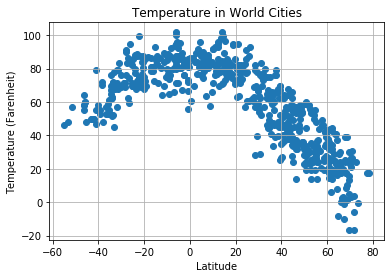

In [18]:
# Build a scatter plot for each data type
plt.scatter(lat, temp_max, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(lat, temp_max, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(lat, temp_max, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(lat, temp_max, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()